In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

# 4. Build a neural network with Keras on the Iris data

***Warning!*** The model built in this notebook behaves a bit weird, probably because the dataset has so few examples! Don't infer too much from it, but rather use it to check how we can write code to pre-process data or specify a Keras model.

**Keras on the Iris dataset for classifying flowers**

We are going to use Keras for a classification problem on tabular/structured data. This means data that is naturally structured into a table, where each row is an observation and each column is a variable which we can understand. We can compare this to a picture, if each row is a picture and each column is a pixel, the column aren't really understandable for us as humans. 

The Iris data is structured like this. It is a common Machine Learning dataset, kind of the "Hello world" of Machine Learning. It contains 150 examples of flowers of 3 species, and the columns represent the length and breadth of different parts of the flower. This dataset isn't actually very useful for neural network because it is simply not so complex that it needs such an advancdes algorithm, but we are using it on this camp to have an easy and fast way to start understanding Keras before we jump into more complex data types :)

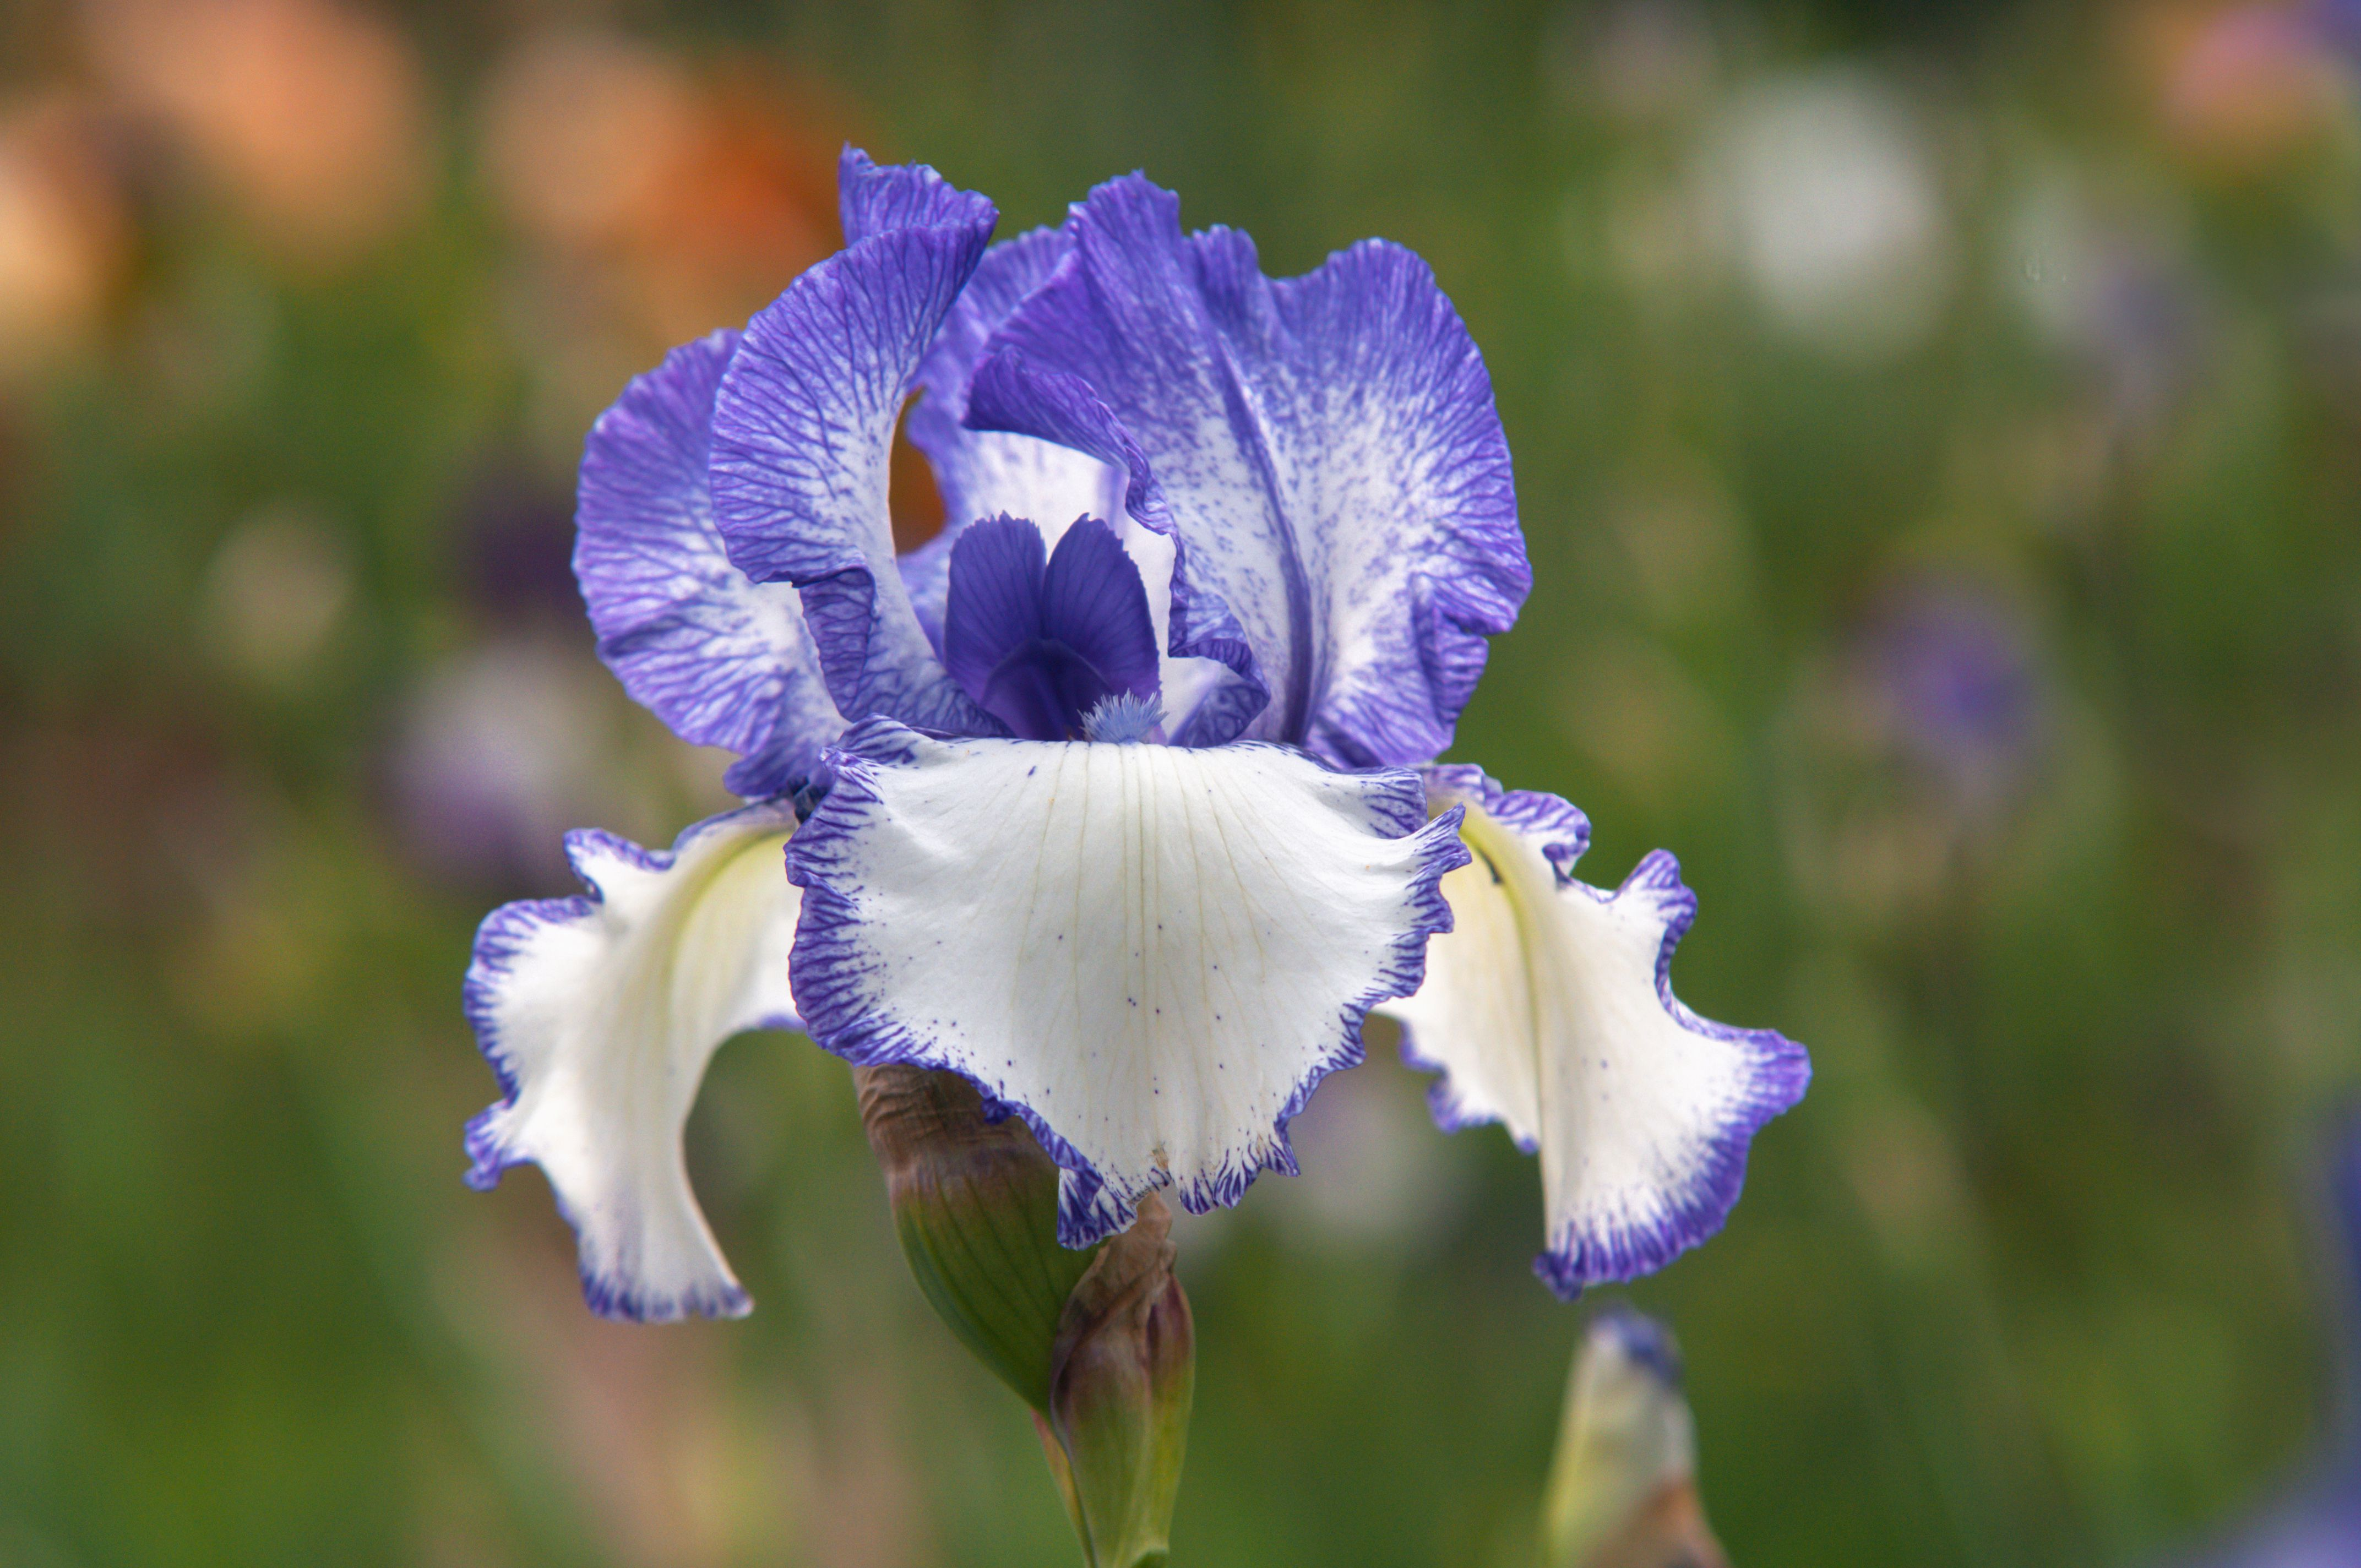

**Attributes/columns**
* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm
* class:
  - Iris Setosa
  - Iris Versicolour
  - Iris Virginica

For simplicity, we will only build an algoritm to detect whether the plant is of species Virginica or not.

In [ ]:
# Import data
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
# Let's check the data
iris['data'].shape

(150, 4)

In [ ]:
# Let's check the attributes
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# Let's check the features
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# Put the data into a Pandas dataframe
df = pd.DataFrame(data=iris['data'], columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Update the target so that we only check for Virginica
df['class'] = [1 if target == 2 else 0 for target in iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


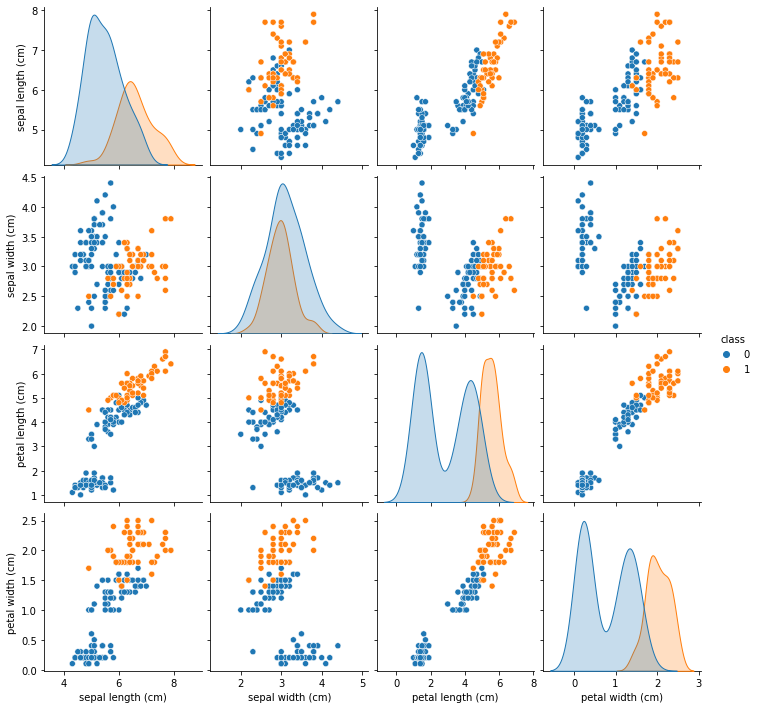

In [ ]:
# Inspect data
sns.pairplot(df, hue = 'class')

In order for the network to deal with the data, we need to re-scale the data so that it has the same scale and range. This is to make the network a better and faster learner. Since we are initializing the parameters randomly at small values, and their size depends on the feature size due to the multiplication, the learning process can get unstable, too dependent on just some variables instead of others or even fail unless we do this.

The procedure is a little different for each such re-scaling method. In this case we are going to use normalization which means we re-scale the data so that it ranges from 0 to 1.

In [ ]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X=df[iris.feature_names])

In [ ]:
# Inspect the first feature before normalization
px.histogram(x=df["sepal length (cm)"], title = "Distribution of sepal length")

In [ ]:
# Inspect the first feature after normalization
px.histogram(x=X[:, 0], title = "Distribution of sepal length after normalization")

In [ ]:
# Get array of target
y = df['class']

In [ ]:
# Inspect the target
print(f"target: ", y)

target:  0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: class, Length: 150, dtype: int64


As a general rule in Machine Learning, we know that the algorithm might learn to replicate the data *too* well. This means that it will be super good at classifying data it has already seen, but really poor when new data comes in. This phenomena is called ***overfitting***. In order to avoid it, we always split the data in to at least two sets - one for training the algorithm, and one for testing (evaluating) the algorithm. 

In [ ]:
# Split data into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

Now we are ready to start building our network architecture! In Keras we use the Sequantial class to step by step add the layers that we want. We can then use the `summary` call to check out or model before training it with the `fit` method. 

Apart form the InputLayer, what we are going to use are Dense layers. This means that they are fully connected - meaning each node in a layer is connected to every node in the previous layer. It doesn't actually always have to be like this, which is something we will learn about further on in the camp. 

Each layer consists of a number of nodes, called units in Keras. So we specify the number of units to have in each layer that we add. In the XOR example, we only had two, but now I'm going to use 10 instead. 

For each layer, we also choose an activation function, just like those we were practising before. 

In [ ]:
# Build model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

model = Sequential()
model.add(InputLayer(name = 'input_layer', input_shape=(4,)))
model.add(Dense(units=24, activation='relu', name = 'hidden_layer_1'))
model.add(Dense(units=12, activation='relu', name = 'hidden_layer_2'))
model.add(Dense(units=6, activation='relu', name = 'hidden_layer_3'))
model.add(Dense(units=1, activation='sigmoid', name = 'output_layer'))

In [ ]:
# Check the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_1 (Dense)       (None, 24)                120       
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 12)                300       
_________________________________________________________________
hidden_layer_3 (Dense)       (None, 6)                 78        
_________________________________________________________________
output_layer (Dense)         (None, 1)                 7         
Total params: 505
Trainable params: 505
Non-trainable params: 0
_________________________________________________________________


Next up, we are going to `compile` the model. This means that we tell it how it should be trained. For example, we specify which loss function to use, how to optimize the parameters and what metrics to collect.

In this case, we will be using Cross Entropy as loss function. This is not the same as we stated before. This one is more suitable for a classification problem, because it can deal with probabilities in a good way. When we train a classification algorithm, we actually just force it to predict the probability that an example data point belongs to the class we're looking for. [Here](https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html) you can read more about different loss functions.

For optimizers, we will use Stochastic Gradient Descent like we learned before. With the help of the `learning_rate` argument, we specify the step size for the algorithm to take after calculation of the gradient. 

Finally, we will collect "accuracy" as metrics, also since it is a classification problem. 

In [ ]:
# Compile the model
from keras.losses import BinaryCrossentropy
from keras.optimizers import SGD

model.compile(
    loss=BinaryCrossentropy(from_logits = False),
    optimizer=SGD(learning_rate=0.01),
    metrics=["accuracy"],
)

Finally it is time to train the model! We do this with the help of the `fit` method. We give it the training data and the training target. 

We also specify `batch_size`, which is how many examples that will be processed/propagated through the network at the same time. We do not want to use them all at ones, since these computations are costly. In a sense, we fit the model little by little by not using all data at ones. If `batch_size` is 50, we will first use 50 examples, then another 50 more, until we've used all training data.

When training a deep learning model, we have to iterate over the data several times and adjust the parameters until we find a good fit. With `epochs`, we specify how many such iterations to do. 

Finally, in order to again try and avoid overfitting, we do not calculate the loss on the same data as we train it on. From the training data, we take some examples and save for evaluation only. We call this validation data, and so with `validation_split` we specify what portion to hold out like this in each iteration. 



In [ ]:
# Train model
history = model.fit(X_train, y_train, batch_size = 50, epochs = 50, validation_split = 0.2)

Epoch 1/50
3/3 [==============================] - 3s 114ms/step - loss: 0.6922 - accuracy: 0.4455 - val_loss: 0.6950 - val_accuracy: 0.3077
Epoch 2/50
3/3 [==============================] - 0s 11ms/step - loss: 0.6912 - accuracy: 0.5545 - val_loss: 0.6926 - val_accuracy: 0.5385
Epoch 3/50
3/3 [==============================] - 0s 12ms/step - loss: 0.6904 - accuracy: 0.6832 - val_loss: 0.6902 - val_accuracy: 0.7308
Epoch 4/50
3/3 [==============================] - 0s 15ms/step - loss: 0.6896 - accuracy: 0.7030 - val_loss: 0.6879 - val_accuracy: 0.7692
Epoch 5/50
3/3 [==============================] - 0s 15ms/step - loss: 0.6887 - accuracy: 0.6634 - val_loss: 0.6891 - val_accuracy: 0.7308
Epoch 6/50
3/3 [==============================] - 0s 13ms/step - loss: 0.6888 - accuracy: 0.6832 - val_loss: 0.6868 - val_accuracy: 0.7308
Epoch 7/50
3/3 [==============================] - 0s 15ms/step - loss: 0.6880 - accuracy: 0.6535 - val_loss: 0.6845 - val_accuracy: 0.7692
Epoch 8/50
3/3 [==========

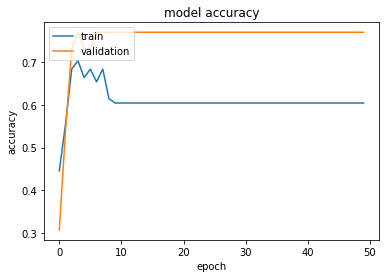

In [ ]:
# Plot evaluation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

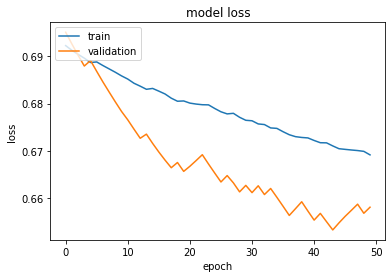

In [ ]:
# Plot the loss function
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# Finally, evaluate on our test set
test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

1/1 - 0s - loss: 0.6507 - accuracy: 0.8261
Test loss: 0.6506892442703247
Test accuracy: 0.8260869383811951


In [ ]:
# Delete the model before trying new settings
del(model)